## Calculating the Return of a Portfolio of Securities

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Load the data for a portfolio composed of 5 stocks - British Petroleum, Ford, Exxon, Lincoln, and Apple *(5_stocks_2000_2017.csv)*.

In [17]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [18]:
mydata = pd.read_csv('D:/Python/5_stocks_2000_2017.csv', index_col = 'Date')

In [19]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4517 entries, 1999-12-31 to 2017-12-12
Data columns (total 5 columns):
BP      4517 non-null float64
F       4517 non-null float64
XOM     4517 non-null float64
LNC     4517 non-null float64
AAPL    4517 non-null float64
dtypes: float64(5)
memory usage: 211.7+ KB


In [20]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
1999-12-31,26.942526,17.911160,25.595554,27.138775,3.291592
2000-01-03,26.715410,17.596191,24.880707,26.502689,3.583733
2000-01-04,26.573452,17.008251,24.404148,25.739405,3.281587
2000-01-05,27.481936,17.071245,25.734549,24.848928,3.329610
2000-01-06,27.538712,17.092241,27.064951,25.303717,3.041471


In [21]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2017-12-06,39.580002,12.3800,82.279999,76.500000,169.009995
2017-12-07,39.310001,12.5300,82.550003,77.589996,169.320007
2017-12-08,39.639999,12.6100,82.660004,78.540001,169.369995
2017-12-11,39.930000,12.5800,83.029999,77.169998,172.669998
2017-12-12,40.709999,12.5242,83.313904,77.559998,172.059998


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [22]:
mydata.iloc[0]

BP      26.942526
F       17.911160
XOM     25.595554
LNC     27.138775
AAPL     3.291592
Name: 1999-12-31, dtype: float64

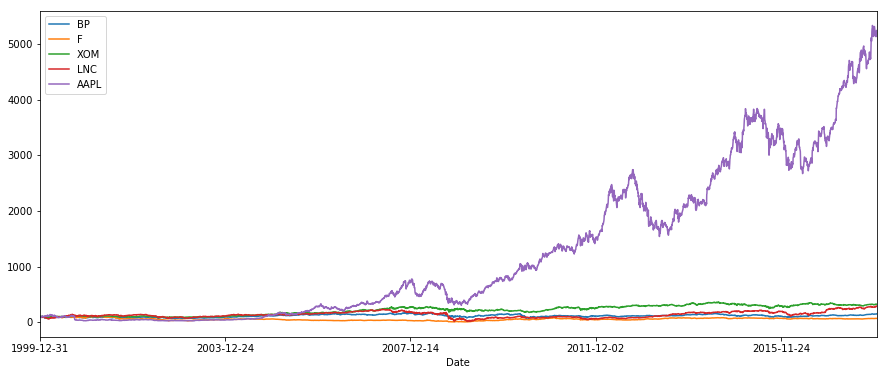

In [23]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [24]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.008430,-0.017585,-0.027929,-0.023438,0.088754
2000-01-04,-0.005314,-0.033413,-0.019154,-0.028800,-0.084310
2000-01-05,0.034188,0.003704,0.054515,-0.034596,0.014634
2000-01-06,0.002066,0.001230,0.051697,0.018302,-0.086538


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [25]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [26]:
annual_returns = returns.mean() * 250
annual_returns

BP      0.062602
F       0.070093
XOM     0.094579
LNC     0.198599
AAPL    0.309165
dtype: float64

In [27]:
np.dot(annual_returns, weights)

0.14700757535575665

Transform the result into a percentage form. 

In [28]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print pfolio_1

14.701 %


Is the return of this portfolio satisfactory?